In [1]:
using ModelingToolkit, DifferentialEquations

@parameters r_GP1 r_ALD N_PFK L_PFK Vf_PFK Vr_PFK K_f6p K_ATP K_f16bp K_ADP K_cit K_AMP K_f26bp
@parameters C_ATP C_ADP C_cit C_AMP f26bp
@variables t f6p(t) f16bp(t) 
D = Differential(t)

#=
eqs = [D(f6p) ~ r_GP1 - r_PFK - r_PFK2 + r_F26BPase,
    D(f16bp) ~ r_PFK - r_ALD,
    D(f26bp) ~ r_PFK2 - r_F26BPase]
=#

#rates = [(r_PFK ~ Vf_PFK*C_ATP*f6p/(K_f6p*K_ATP) - Vr_PFK*C_ADP*f16bp/(K_f16bp*K_ADP))/((1+f6p/K_f6p)*(1+C_ATP/K_ATP)+(1+f16bp/K_f16bp)*(1+C_ADP/K_ADP)-1)]
N_PFK = 1 + L_PFK*(1+C_ATP/K_ATP)^4*(1+C_cit/K_cit)/((1+f6p/K_f6p+f16bp/K_f16bp)^4+(1+C_AMP/K_AMP)^4*(1+f26bp/K_f26bp)^4)
r_PFK = (Vf_PFK*C_ATP*f6p/(K_f6p*K_ATP) - Vr_PFK*C_ADP*f16bp/(K_f16bp*K_ADP))/((1+f6p/K_f6p)*(1+C_ATP/K_ATP)+(1+f16bp/K_f16bp)*(1+C_ADP/K_ADP)-1)*(1/N_PFK)


eqs = [D(f6p) ~ r_GP1 - r_PFK,
    D(f16bp) ~ r_PFK - r_ALD]

@named sys = ODESystem(eqs, t)


Model sys with 2 equations
Unknowns (2):
  f6p(t)
  f16bp(t)
Parameters (17):
  K_f16bp
  K_AMP
  K_ATP
  K_ADP
⋮

In [15]:
sys=structural_simplify(sys)

u0 = [f6p => 100,
    f16bp => 0.1]

p1 = [r_GP1 => 0.9, 
    r_ALD => 0.9,
    L_PFK => 2*10^-3,
    Vf_PFK => 15.5*10^2,
    Vr_PFK => 6.78*10^1, 
    K_f6p => 6*10^-2,
    K_ATP => 0.1,
    K_f16bp => 0.65,
    K_ADP => 0.1,
    K_cit => 0.1,
    K_AMP => 0.3,
    K_f26bp => 5.5*10^-3]

p2 = [C_ATP => 0.1, 
    C_ADP => 0.9,
    C_cit => 0.1,
    C_AMP => 0.1,
    f26bp => 0.1]    

p= [p1  
    p2]

    

17-element Vector{Pair{Num, Float64}}:
   r_GP1 => 0.9
   r_ALD => 0.9
   L_PFK => 0.002
  Vf_PFK => 1550.0
  Vr_PFK => 67.8
   K_f6p => 0.06000000000000001
   K_ATP => 0.1
 K_f16bp => 0.65
   K_ADP => 0.1
   K_cit => 0.1
   K_AMP => 0.3
 K_f26bp => 0.0055
   C_ATP => 0.1
   C_ADP => 0.9
   C_cit => 0.1
   C_AMP => 0.1
   f26bp => 0.1

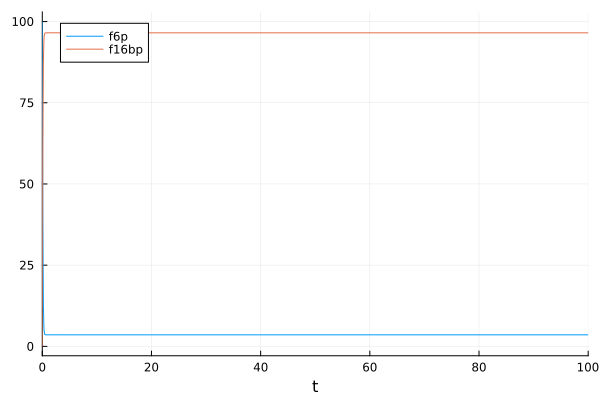

In [16]:
tspan = (0.0, 100)
prob = ODEProblem(sys, u0, tspan, p, jac = true)
sol = solve(prob)

using Plots
plot(sol)

In [17]:
sol[end]

2-element Vector{Float64}:
  3.564317640362524
 96.53568235963745